In [1]:
import math
import numpy as np
import Danish as Aztec

def e_(face, edge) : # e'
    edges = face.edges
    i = edges.index(edge)
    return edges[(i + 2) % 4]

In [2]:
def weight_computation(grid) :
    n = grid.n
    for k in range(n-1, -1, -1) :
        Ak = grid.get_Am(k + 1)
        for face in Ak:
            (i, j) = face.bottom_left
            if ((i + j - (k + 1) ) % 2 != 0)  :
                #print(str(i) + ' ' + str(j) + ' ' + str(k+1))

                e1 = face.edges[0]      # Edges are in anticlockwise order so two consecutive edges are adjacent
                e2 = face.edges[1]

                alpha = e_(face, e1).w[k]
                gamma = e1.w[k]
                beta = e2.w[k]
                delta = e_(face, e2).w[k]

                print("Hello")
                face.DP[k] = e_(face, e1).w[k]*e1.w[k] + e2.w[k]*e_(face, e2).w[k]

                if (face.DP[k] != 0) :
                    face.DP[k] = e_(face, e1).w[k]*e1.w[k] + e2.w[k]*e_(face, e2).w[k]
                    e_(face, e1).w[k-1] = gamma / face.DP[k]
                    e1.w[k-1] = alpha / face.DP[k]
                    e2.w[k-1] = delta / face.DP[k]
                    e_(face, e2).w[k-1] = beta / face.DP[k]
                elif alpha + beta != 0 :
                    e1.w[k-1] = alpha
                    e_(face, e1).w[k-1] = 1 / (alpha + beta)
                    e2.w[k-1] = 1 / (alpha + beta)
                    e_(face, e1).w[k-1] = beta
                elif delta + gamma != 0 :
                    e1.w[k-1] = 1 / (delta + gamma)
                    e_(face, e1).w[k-1] = gamma
                    e2.w[k-1] = delta
                    e_(face, e2).w[k-1] = 1 / (delta + gamma)


In [3]:
def generate_matching(grid) :
    n = grid.n
    rng = np.random.default_rng(seed=42)
    M = dict()

    for k in range(0, n) :
        Am = grid.get_Am(k+1)     #   Get A_k's face
        for face in Am :
             (i, j) = face.bottom_left
             if (i + j - k) % 2 == 0 :
                 # Case 3
                alpha = face.edges[2]
                gamma = face.edges[0]
                beta  = face.edges[1]
                delta = face.edges[3]

                #print(str(i) + ' ' + str(j) + ' ' + str(k))

                if not ( (frozenset(alpha.e) in M) or (frozenset(beta.e) in M) or (frozenset(delta.e) in M) or (frozenset(gamma.e) in M) ) :
                     if rng.random() < alpha.w[k]*gamma.w[k] / (alpha.w[k]*gamma.w[k] + beta.w[k]*delta.w[k]) :
                         M[frozenset(gamma.e)] = gamma
                         M[frozenset(alpha.e)] = alpha
                     else :
                         M[frozenset(delta.e)] = delta
                         M[frozenset(beta.e)] = beta
                 # Case 2
                elif ((frozenset(alpha.e) in M) and (frozenset(gamma.e) in M ) ) : # or ((frozenset(beta.e) in M) or (frozenset(delta.e) in M)) ):
                    del M[frozenset(alpha.e)]
                    del M[frozenset(gamma.e)]
                elif ((frozenset(beta.e) in M) and (frozenset(delta.e) in M ) ) :
                    del M[frozenset(beta.e)]
                    del M[frozenset(delta.e)]
                 # Case 3
                elif (frozenset(alpha.e) in M) :
                    del M[frozenset(alpha.e)]
                    M[frozenset(gamma.e)] = gamma
                elif (frozenset(gamma.e) in M) :
                    del M[frozenset(gamma.e)]
                    M[frozenset(alpha.e)] = alpha
                elif (frozenset(beta.e) in M) :
                    del M[frozenset(beta.e)]
                    M[frozenset(delta.e)] = delta
                elif (frozenset(delta.e) in M) :
                    del M[frozenset(delta.e)]
                    M[frozenset(beta.e)] = beta

    return M.values()

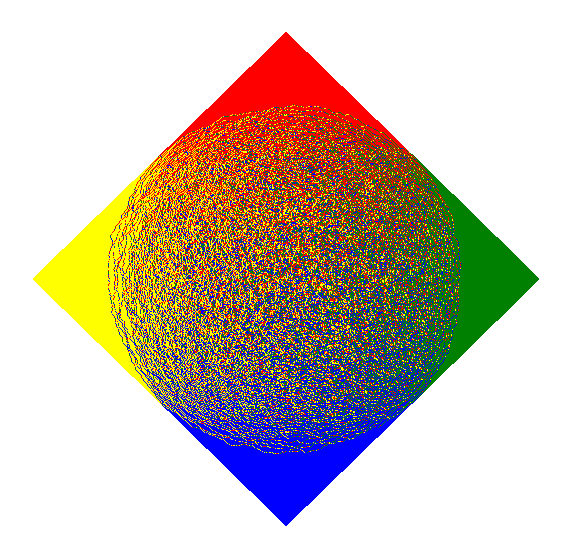

In [9]:
grid = Aztec.Diamond(500)
weight_computation(grid)

M = generate_matching(grid)
matching = [tuple(edge.e) for edge in M]
grid.plot_board(M = matching)